In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [19]:
from matplotlib_venn import venn2

In [22]:
%matplotlib inline

# CondSig list

In [109]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/MotifFinding')
ps_df_dict = {}
ps_df_dict['nonpromoter'] = pd.concat([pd.read_csv('yu_condsig_results/mESC_nonpromoter_unique_condensate_like_signatures.txt', sep = "\t", header = 0), 
                                      pd.read_csv('yu_condsig_results/K562_nonpromoter_unique_condensate_like_signatures.txt', sep = "\t", header = 0)],
                                     axis = 0)
ps_df_dict['promoter'] = pd.concat([pd.read_csv('yu_condsig_results/mESC_promoter_unique_condensate_like_signatures.txt', sep = "\t", header = 0),
                                   pd.read_csv('yu_condsig_results/mESC_promoter_unique_condensate_like_signatures.txt', sep = "\t", header = 0)],
                                  axis = 0)
ps_df_dict['nonpromoter']

,signature_name,component_TR,topic_coherence,qualified_CL_features,qualified_CL_features_count,mean_AUROC,mean_feature_importance
0,mESC_GSM1199183_EZH2_topic2,"mESC_GSM2460999_KDM4C,mESC_GSM1693794_HEXIM1,m...",3.163779,"Disordered domain,LLPS capacity,MLO,PPI,RNA bi...",5,0.848000,1.293975
1,mESC_GSM2286873_AFF3_topic3,"mESC_GSM2417169_EP300,mESC_GSM935891_ELL3,mESC...",3.242082,"Disordered domain,LLPS capacity,MLO,PPI,RNA bi...",5,0.816000,1.160083
2,mESC_GSM1400980_DPPA2_topic3,"mESC_GSM1288311_TCF12,mESC_GSM2711414_PHIP,mES...",2.134325,"Disordered domain,LLPS capacity,MLO,PPI,RNA bi...",5,0.782000,1.617198
3,mESC_GSM611192_TET1_topic6,"mESC_GSM1288311_TCF12,mESC_GSM2417143_SOX2,mES...",1.547244,"Disordered domain,LLPS capacity,MLO,PPI,RNA bi...",5,0.752000,1.155107
4,mESC_GSM2356586_CBX7_topic2,"mESC_GSM1399511_SUZ12,mESC_GSM1272795_RNF2,mES...",3.492187,"Disordered domain,LLPS capacity,MLO,PPI,RNA bi...",5,0.732000,1.459169
...,...,...,...,...,...,...,...
79,K562_GSM935343_GTF3C2_topic1,"K562_ENCSR948QLZ_1_CBX1,K562_ENCSR257XVY_2_ZNF...",2.161459,"LLPS capacity,MLO,RNA binding strength",3,0.716667,1.248044
80,K562_ENCSR847LBF_2_FOXJ2_topic1,"K562_ENCSR194IJN_2_ZNF766,K562_ENCSR343ELW_2_L...",2.038880,"Disordered domain,MLO,PPI",3,0.710000,1.435497
81,K562_GSM2789808_FAM208A_topic3,"K562_ENCSR194IJN_2_ZNF766,K562_ENCSR643VTW_1_S...",1.789965,"MLO,RNA binding domain,RNA binding strength",3,0.703333,1.083037
82,K562_GSM803446_YY1_topic4,"K562_GSM935344_MAX,K562_ENCSR737LTZ_1_MYNN,K56...",1.944275,"LLPS capacity,MLO,RNA binding strength",3,0.703333,1.061978


In [110]:
ps_tr_ls = []
for t in ['nonpromoter', 'promoter'] :
    l = ps_df_dict[t]['component_TR'].str.split(',').tolist()
    ps_tr_ls += [item for sublist in l for item in sublist]

ps_tr_ls = set([x.split('_')[-1] for x in ps_tr_ls])
len(ps_tr_ls)

212

In [115]:
ps_topic_dict = {}
for t in ['nonpromoter', 'promoter'] :
    for topic in ps_df_dict[t]['signature_name'] :
        l = ps_df_dict[t][ps_df_dict[t]['signature_name'] == topic]['component_TR'].str.split(',').tolist()
        ll = [item for sublist in l for item in sublist]
        topic1 = "_".join([topic.split('_')[0]] + topic.split('_')[-2:])
        ps_topic_dict[f"{t}_{topic1}"] = set([x.split('_')[-1] for x in ll])
    
ps_topic_dict['nonpromoter_mESC_EZH2_topic2']

{'AEBP2', 'DDX21', 'HEXIM1', 'KDM2B', 'KDM4C', 'KMT2D'}

# cistrome toolkit result

In [123]:
cobinding_TF_ls_dict = {}
cobinding_TF_df_dict = {}
for top in [200] :
    cobinding_TF_ls_dict[top] = {}
    cobinding_TF_df_dict[top] = {}
    for condition in ['wiRepeats', 'woRepeats', 'total'] :
        cobinding_TF_ls_dict[top][condition] = {}
        cobinding_TF_df_dict[top][condition] = {}
        n = '' if condition == 'total' else f'_{condition}'
        for progress in ['Universal','EarlyEmbryoSpecific','PGCSpecific','SpermSpecific','RetinalSpecific','HeartSpecific','LiverSpecific'] :
            try :
                gene_df = pd.read_csv(f'{condition}/cistrome_toolkit_results/{progress}{n}.CHM.bed_result.csv').head(top)
                gene_df_10TF = gene_df.loc[gene_df['Factor'].isin(gene_df.groupby(['Factor']).mean().sort_values(['GIGGLE_score'], ascending = False).index[:10])]
                cobinding_TF_df_dict[top][condition][progress] = gene_df_10TF
                cobinding_TF_ls_dict[top][condition][progress] = gene_df_10TF['Factor'].tolist()
            except :
                continue
#             print(progress, condition, gene_df.shape[0])

cobinding_TF_df_dict[top][condition][progress]

,GSM_ID,Factor,Biosource,GIGGLE_score
0,GSM1234310,KLF4,J1;Embryonic Stem Cell;Embryo,40.518120
1,GSM1499118,CHD4,Embryonic Stem Cell,40.493288
2,GSM2417147,KLF4,MEFs;Embryonic Fibroblast,36.688212
3,GSM1199011,MYC,Epithelium;Corneal Epithelium,26.221346
5,GSM1868611,SUMO2,Dendritic Cell;Bone Marrow,23.735541
6,GSM1234315,KLF4,J1;Embryonic Stem Cell;Embryo,23.634010
8,GSM1827604,MECP2,Epithelium;Olfactory,23.223135
9,GSM2438464,KLF4,Embryonic Stem Cell,23.055976
10,GSM1090229,TBX3,Embryo,22.879166
11,GSM2055542,SETDB1,B Lymphocyte,22.622765


# overlap

## by topic

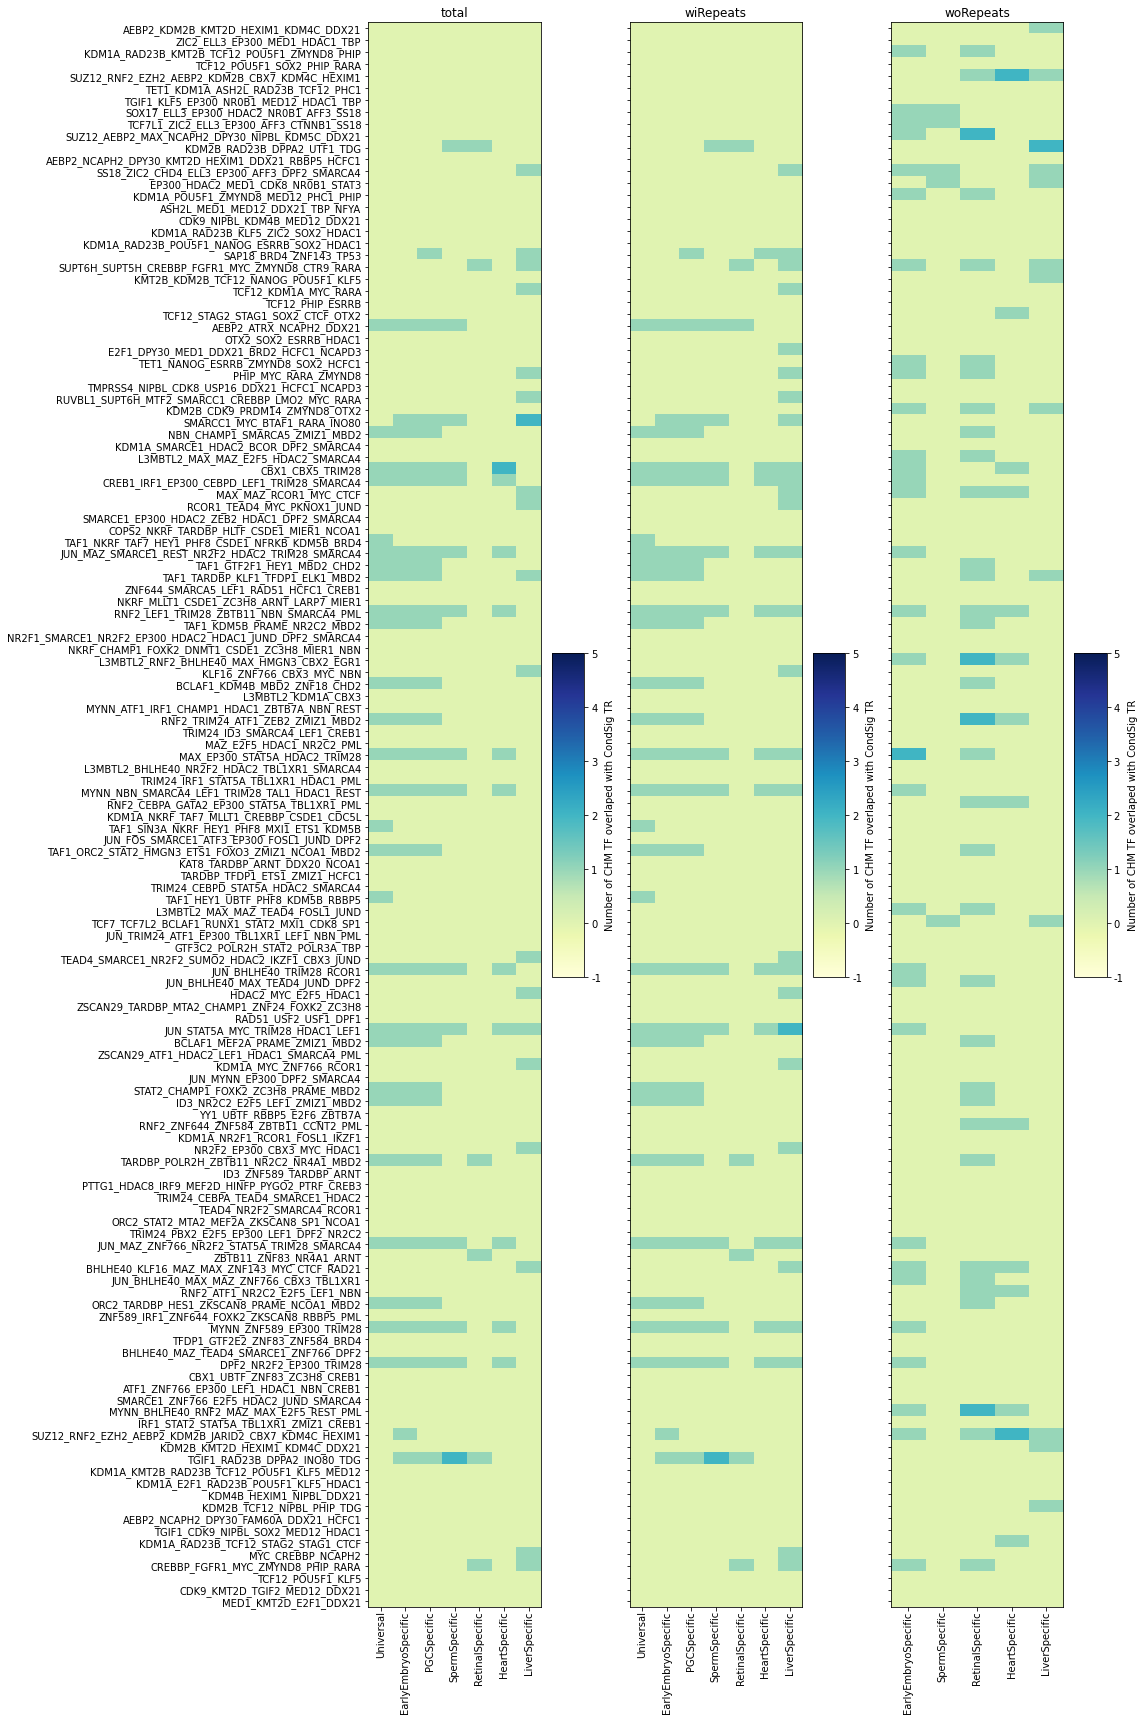

In [140]:
topic_chm_df_dict = {}
topic_chm_dict = {}
for top in [200] :
    topic_chm_dict[top] = {}
    topic_chm_df_dict[top] = {}
    fig, axes = plt.subplots(1,3, figsize = (6.4 * 2.5, 4.8 * 5), tight_layout = True, sharey = True)
    for i,condition in enumerate(['total', 'wiRepeats', 'woRepeats']) :
        ax = axes[i]
        topic_chm_dict[top][condition] = {}
        for j,progress in enumerate(['Universal','EarlyEmbryoSpecific','PGCSpecific','SpermSpecific','RetinalSpecific','HeartSpecific','LiverSpecific']) :
            try :
                chm_tf_ls = set(cobinding_TF_df_dict[top][condition][progress]['Factor'])
                topic_chm_dict[top][condition][progress] = {}
                for k in ps_topic_dict.keys() :
                    ov = ps_topic_dict[k] & chm_tf_ls
                    topic_chm_dict[top][condition][progress]['_'.join(ps_topic_dict[k])] = len(ov)
#                     if ov :
#                         print(progress, condition, top, ov, k)                    
            except :
#                 for k in ps_topic_dict.keys() :
#                     topic_chm_dict[top][condition][progress][k] = -1
                continue
        
        topic_chm_df_dict[top][condition] = pd.DataFrame.from_dict(topic_chm_dict[top][condition])
        pos = ax.imshow(topic_chm_df_dict[top][condition],
                  aspect = 'auto',
                  vmax = 5,
                  vmin = -1,
                  cmap = 'YlGnBu',
                )
    
        cbar = fig.colorbar(pos, ax=ax, extend='neither', ticks= [-1] + [x for x in range(11)], aspect = 10)
        cbar.set_label('Number of CHM TF overlaped with CondSig TR')
        cbar.ax.set_yticklabels([-1] + [x for x in range(11)]) 

        ax.set_yticks(range(topic_chm_df_dict[top][condition].shape[0]))
        ax.set_yticklabels(topic_chm_df_dict[top][condition].index)
        ax.set_xticks(range(topic_chm_df_dict[top][condition].shape[1]))
        ax.set_xticklabels(topic_chm_df_dict[top][condition].columns, rotation = 90, ha = 'center', va = 'center_baseline')
        ax.set_title(f'{condition}')
    fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make9_heatmap_TF_binding_CondSig_topic_overlap_top10TF.pdf', transparent = True)

In [130]:
plot_df = topic_chm_df_dict[top]['woRepeats'].loc[~(topic_chm_df_dict[top]['woRepeats']==0).all(axis=1)]
plot_df.iloc[plot_df == -1] = 0
plot_df

<ipython-input-130-7063266559c1>:2: FutureWarning: DataFrame indexer for .iloc is deprecated and will be removed ina future version.
consider using .loc with a DataFrame indexer for automatic alignment.
  plot_df.iloc[plot_df == -1] = 0


,Universal,EarlyEmbryoSpecific,PGCSpecific,SpermSpecific,RetinalSpecific,HeartSpecific,LiverSpecific
nonpromoter_mESC_EZH2_topic2,0,0,0,0,0,0,1
nonpromoter_mESC_AFF3_topic3,0,0,0,0,0,0,0
nonpromoter_mESC_DPPA2_topic3,0,1,0,0,1,0,0
nonpromoter_mESC_TET1_topic6,0,0,0,0,0,0,0
nonpromoter_mESC_CBX7_topic2,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...
promoter_mESC_POLR2A_topic3,0,0,0,0,0,0,0
promoter_mESC_PHIP_topic1,0,1,0,0,1,0,0
promoter_mESC_DDX21_topic2,0,0,0,0,0,0,0
promoter_mESC_GTF2B_topic2,0,0,0,0,0,0,0


In [145]:
text_df.reset_index().drop('index', axis = 1)

,Universal,EarlyEmbryoSpecific,PGCSpecific,SpermSpecific,RetinalSpecific,HeartSpecific,LiverSpecific
0,,,,,,,
1,,,,,,,
2,,,,,,,
3,,,,,,,
4,,,,,,,
...,...,...,...,...,...,...,...
128,,,,,,,MYC
129,,,,,FGFR1,,MYC
130,,,,,,,
131,,,,,,,


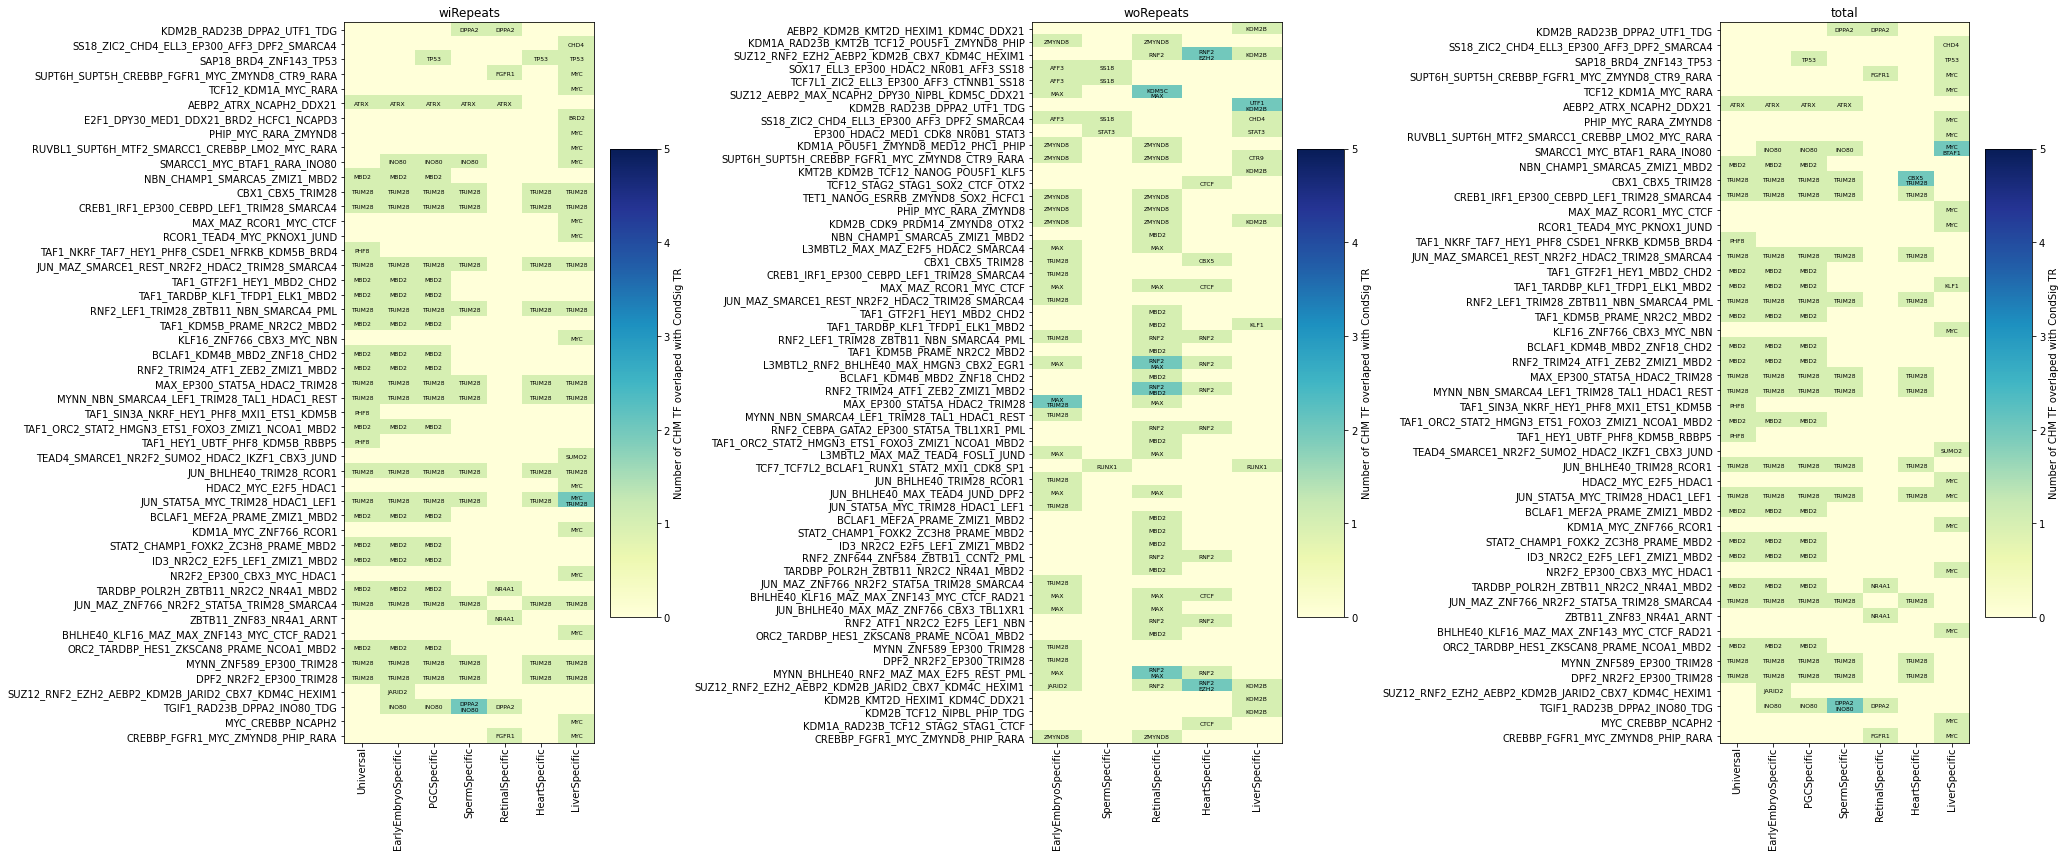

In [173]:
topic_chm_df_dict = {}
topic_chm_df_dict_component = {}
topic_chm_dict = {}
topic_chm_dict_component = {}

for top in [200] :
    topic_chm_dict[top] = {}
    topic_chm_dict_component[top] = {}
    topic_chm_df_dict[top] = {}
    topic_chm_df_dict_component[top] = {}
    fig, axes = plt.subplots(1,3, figsize = (6.4 * 4.5, 4.8 * 2.5), tight_layout = True, sharey = False)
    for i,condition in enumerate(['wiRepeats', 'woRepeats', 'total']) :
        ax = axes[i]
        topic_chm_dict[top][condition] = {}
        topic_chm_dict_component[top][condition] = {}
        for j,progress in enumerate(['Universal','EarlyEmbryoSpecific','PGCSpecific','SpermSpecific','RetinalSpecific','HeartSpecific','LiverSpecific']) :
            try :
                chm_tf_ls = set(cobinding_TF_df_dict[top][condition][progress]['Factor'])
                topic_chm_dict[top][condition][progress] = {}
                topic_chm_dict_component[top][condition][progress] = {}
                for k in ps_topic_dict.keys() :
                    ov = ps_topic_dict[k] & chm_tf_ls
                    topic_chm_dict[top][condition][progress]['_'.join(ps_topic_dict[k])] = len(ov)
                    topic_chm_dict_component[top][condition][progress]['_'.join(ps_topic_dict[k])] = "\n".join(ov)
#                     if ov :
#                         print(progress, condition, top, ov, k)                    
            except :
#                 for k in ps_topic_dict.keys() :
#                     topic_chm_dict[top][condition][progress][k] = -1
                continue
        
        topic_chm_df_dict[top][condition] = pd.DataFrame.from_dict(topic_chm_dict[top][condition])
        topic_chm_df_dict_component[top][condition] = pd.DataFrame.from_dict(topic_chm_dict_component[top][condition])
        plot_df = topic_chm_df_dict[top][condition].loc[~(topic_chm_df_dict[top][condition]==0).all(axis=1)].reset_index()
        text_df = topic_chm_df_dict_component[top][condition].loc[~(topic_chm_df_dict[top][condition]==0).all(axis=1)].reset_index().drop('index', axis = 1)
        pos = ax.imshow(plot_df.iloc[:,1:],
                  aspect = 'auto',
                  vmax = 5,
                  vmin = 0,
                  cmap = 'YlGnBu',
                )
    
        cbar = fig.colorbar(pos, ax=ax, extend='neither', ticks= [-1] + [x for x in range(11)], aspect = 10)
        cbar.set_label('Number of CHM TF overlaped with CondSig TR')
        cbar.ax.set_yticklabels([-1] + [x for x in range(11)]) 

        ax.set_yticks(range(plot_df.shape[0]))
        ax.set_yticklabels(plot_df['index'])
        ax.set_xticks(range(plot_df.shape[1] - 1))
        ax.set_xticklabels(plot_df.columns[1:], rotation = 90, ha = 'center', va = 'center_baseline')
        ax.set_title(f'{condition}')
        
        for i in range(plot_df.shape[0]):
            for j in range(plot_df.shape[1] - 1):
                text = ax.text(j, i, text_df.iloc[i, j],
                               ha="center", va="center", color="black", size = 6)
        
        
        
    fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make9_heatmap_TF_binding_CondSig_topic_overlap_top10TF_wo0.pdf', transparent = True)

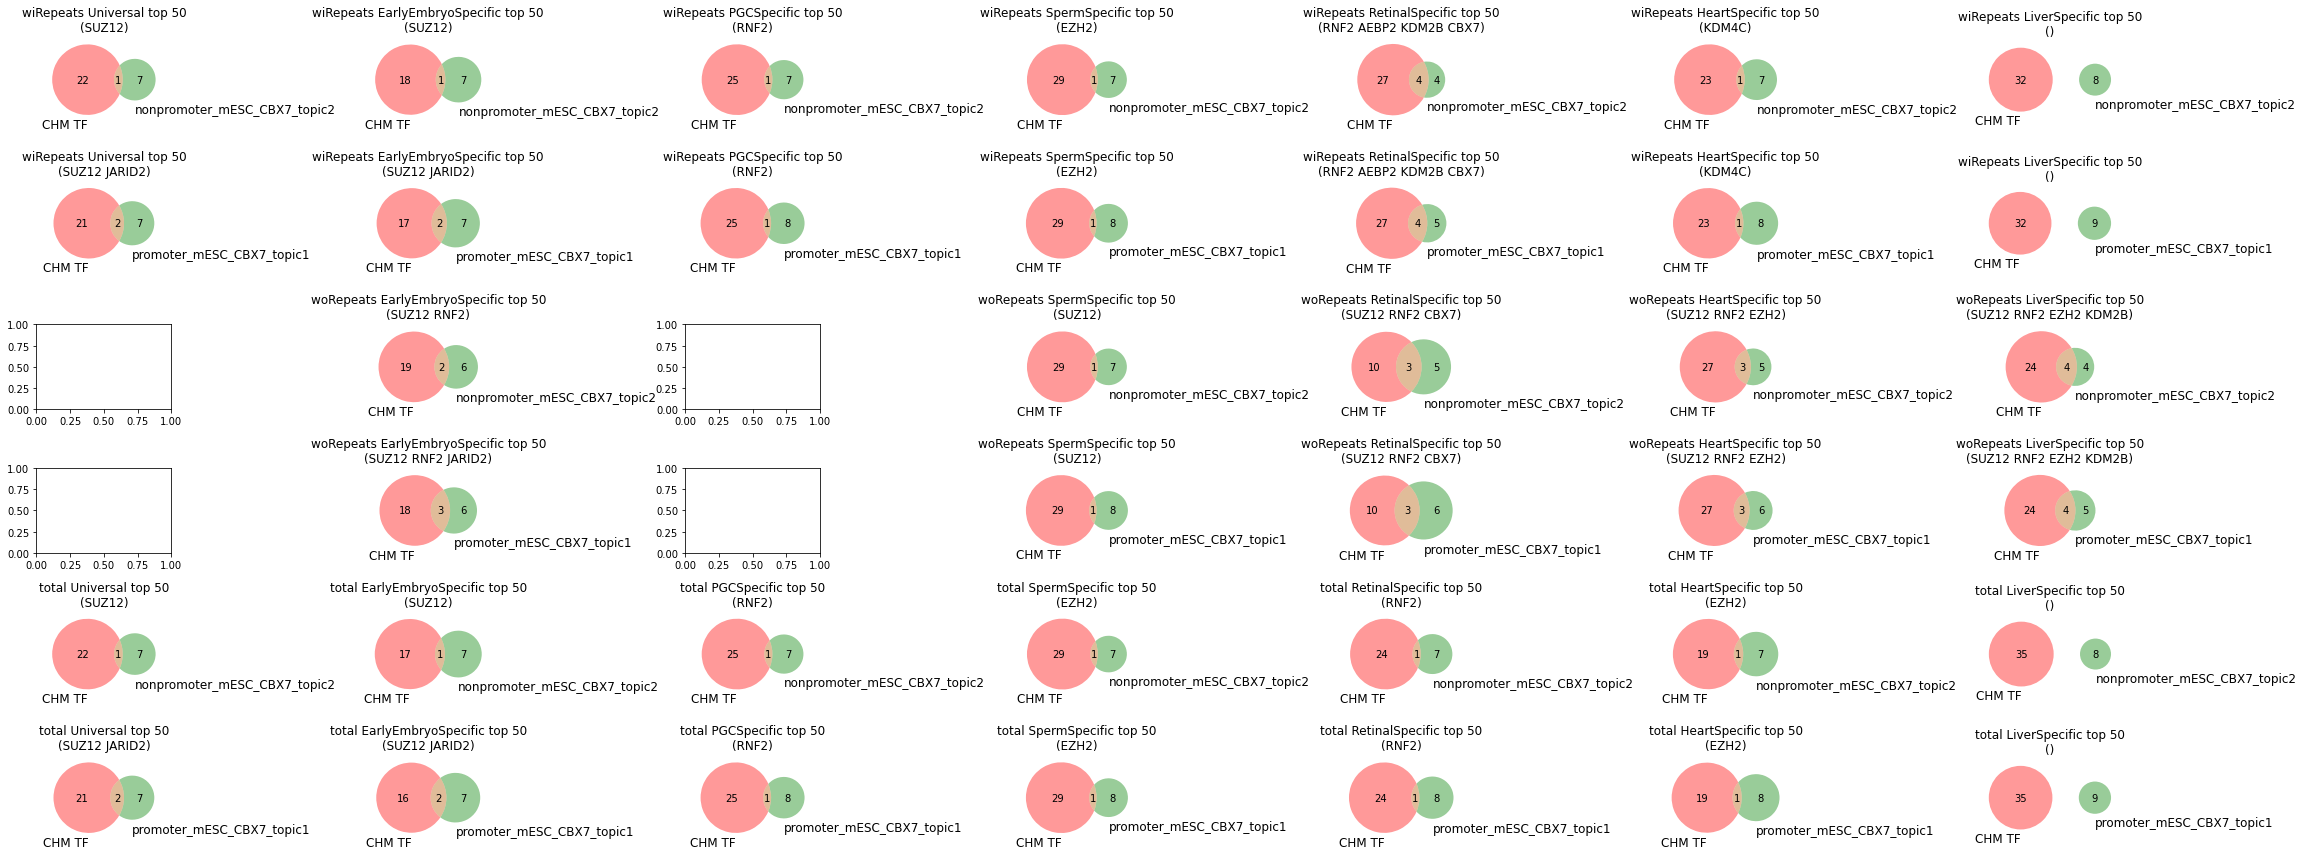

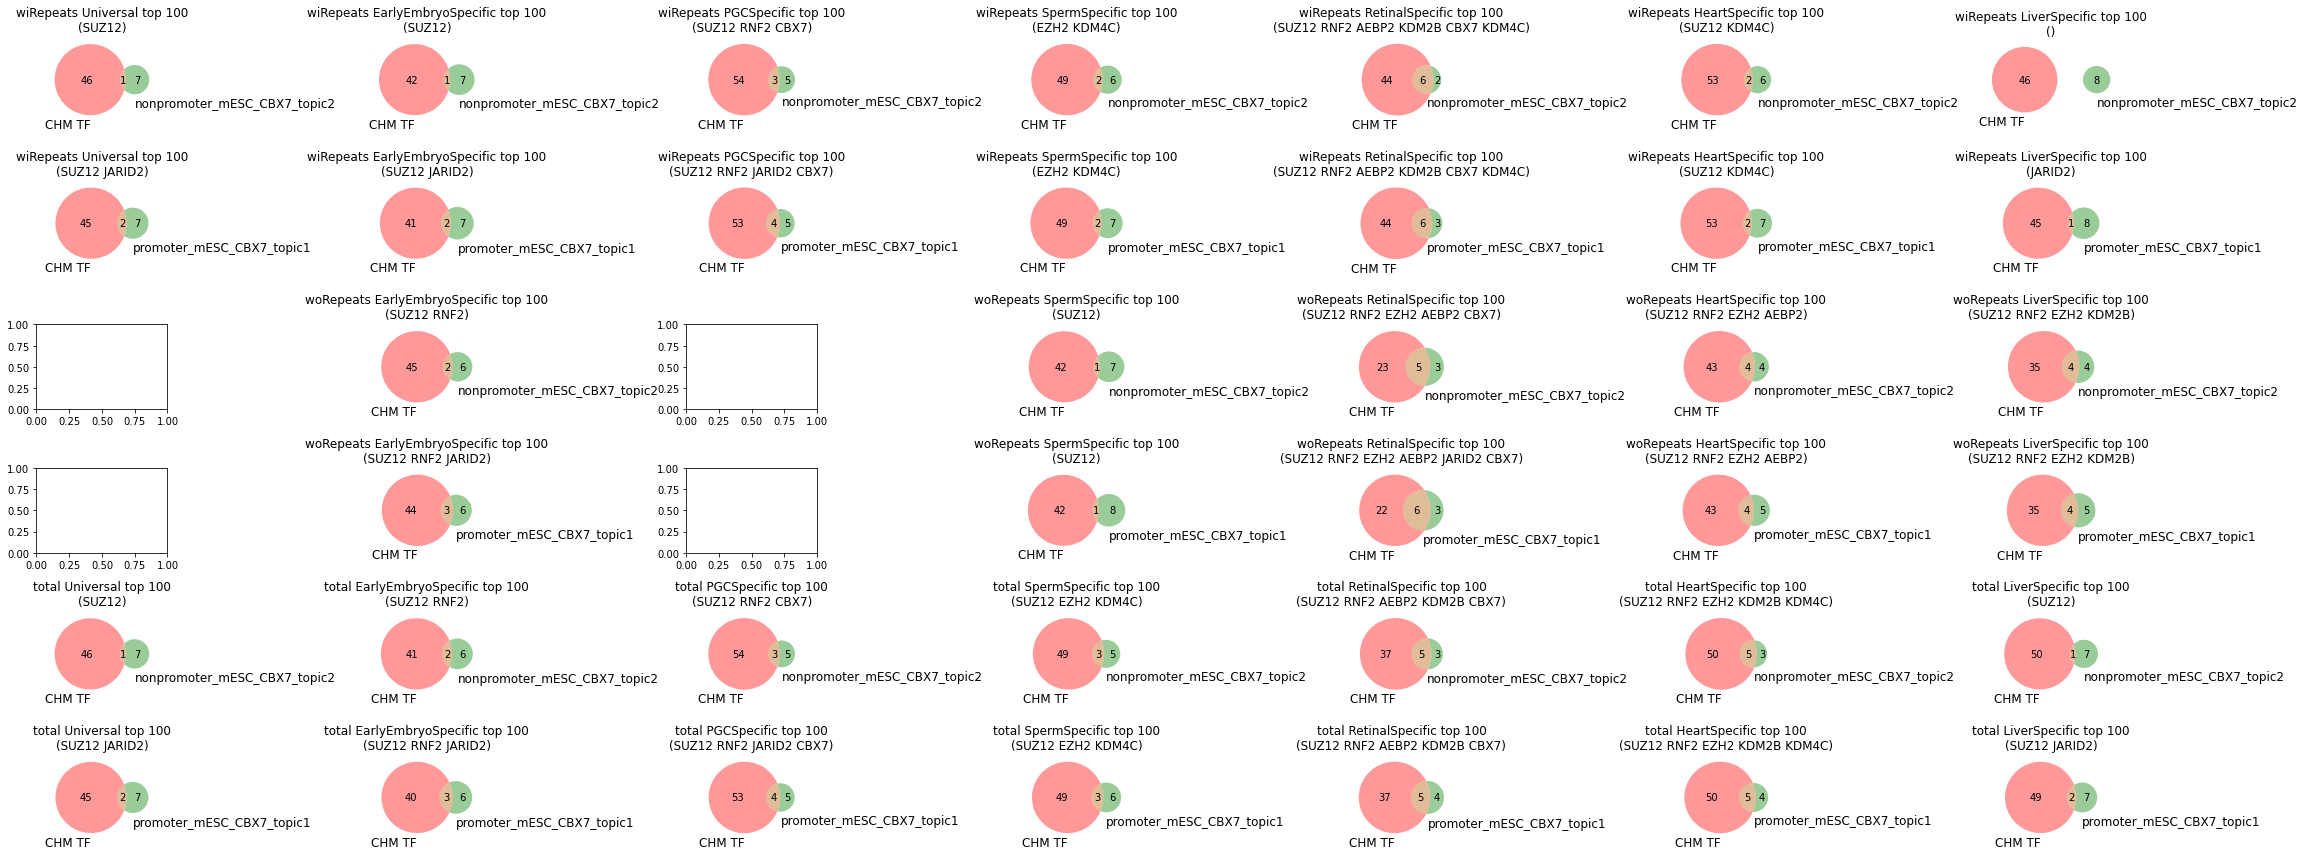

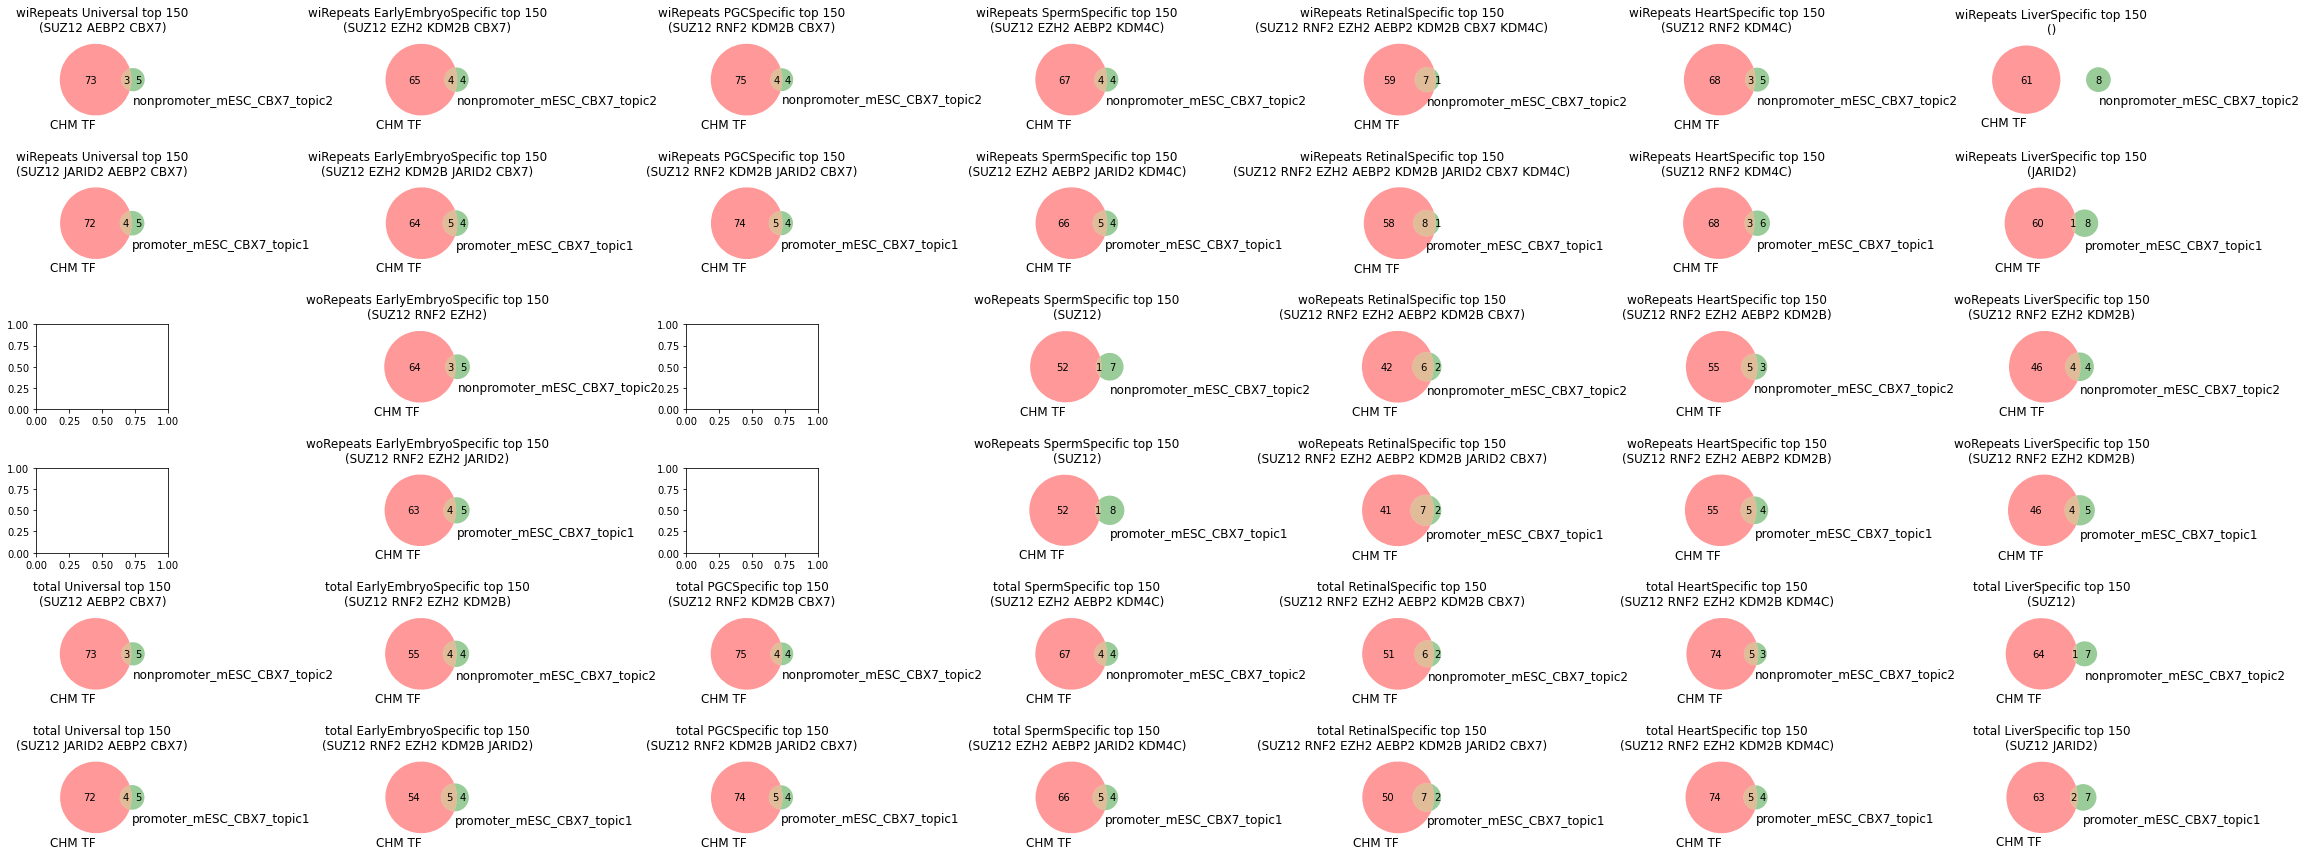

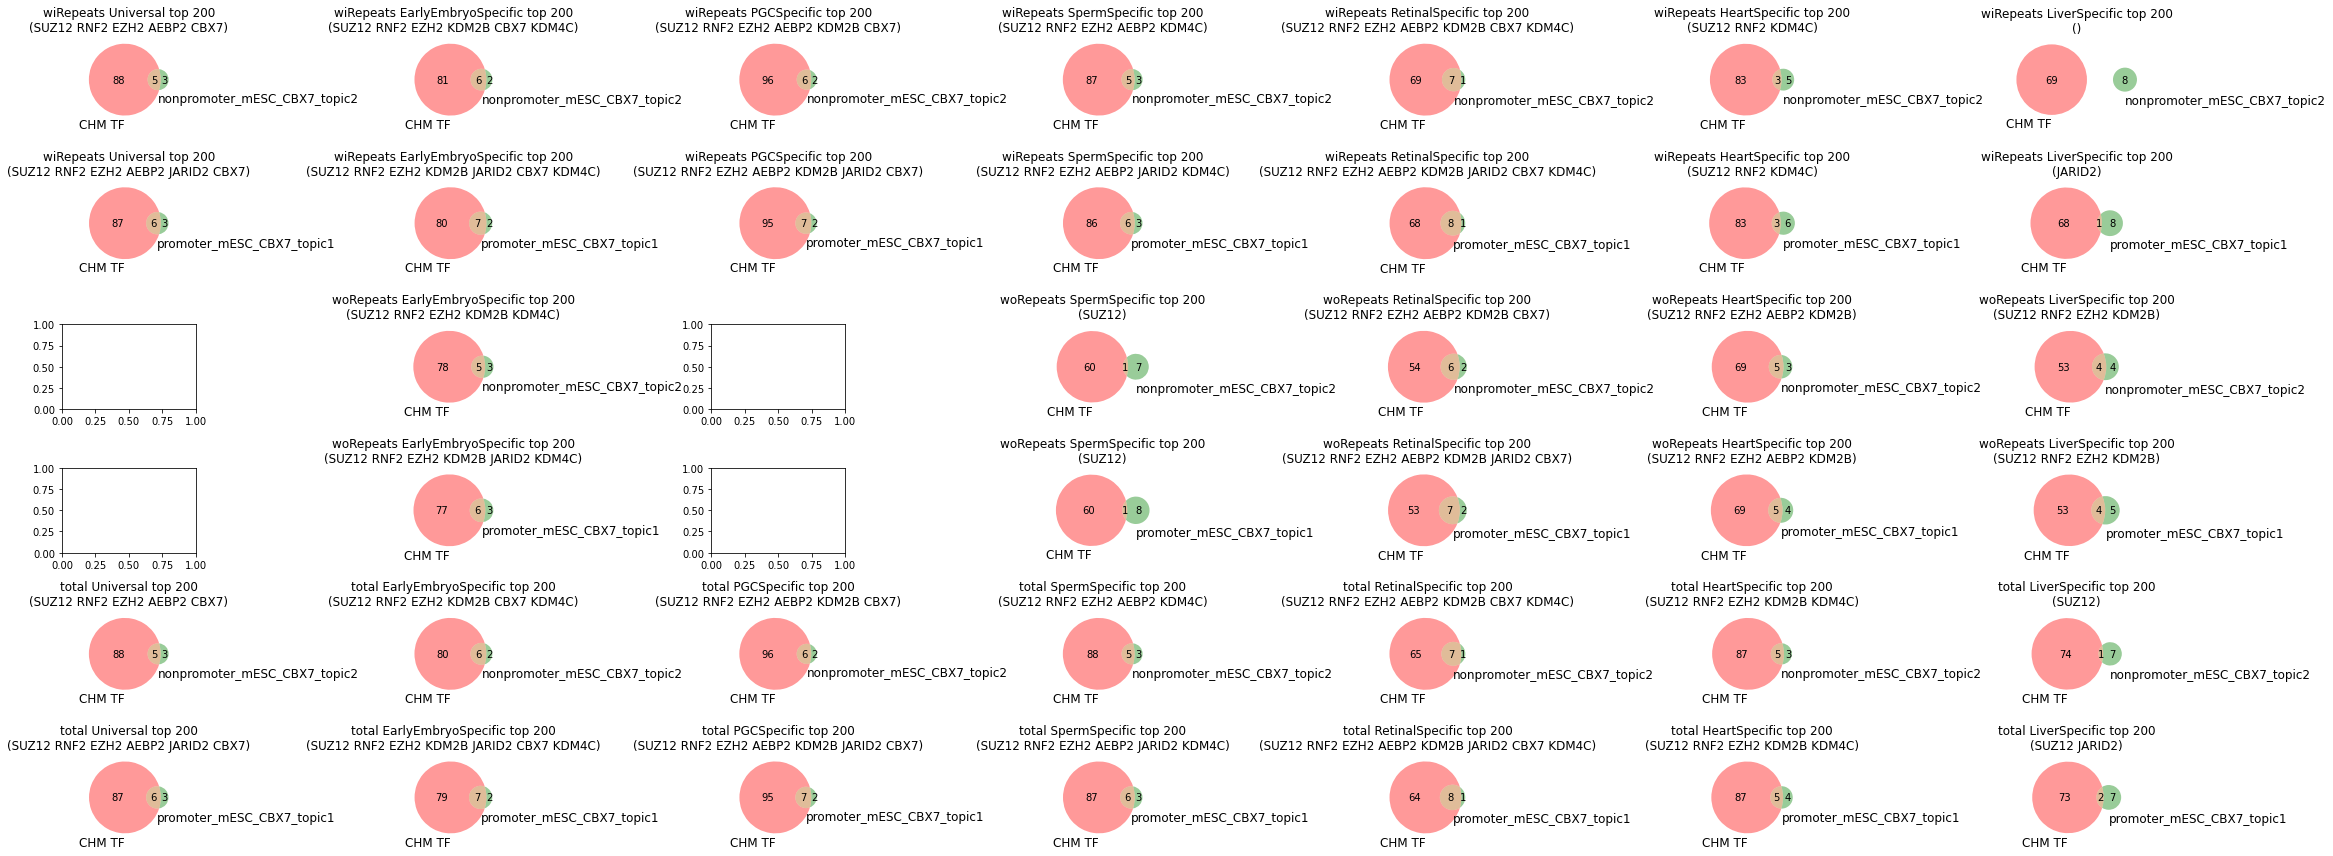

In [122]:
for top in [50, 100, 150, 200] :
    fig, axes = plt.subplots(6,7, figsize = (6.4 * 5, 4.8 * 2.5), tight_layout = True)
    for j,progress in enumerate(['Universal','EarlyEmbryoSpecific','PGCSpecific','SpermSpecific','RetinalSpecific','HeartSpecific','LiverSpecific']) :
        for i,condition in enumerate(['wiRepeats', 'woRepeats', 'total']) :
            try :
                chm_tf_ls = set(cobinding_TF_df_dict[top][condition][progress]['Factor'])
                for a,k in enumerate(['nonpromoter_mESC_CBX7_topic2', 'promoter_mESC_CBX7_topic1']) :
                    ov1 = ps_topic_dict[k] & chm_tf_ls
#                     print(ov1)
                    ax = axes[i * 2 + a,j]
                    venn2(
                        [chm_tf_ls, ps_topic_dict[k]],
                        ax = ax,
                        set_labels=("CHM TF", k)
                         )    
#                     ax.text(1,1, " ".join(ov1))
                    ax.set_title(f"{condition} {progress} top {top}\n({' '.join(ov1)})")
            except :
                continue
    fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make9_venn_phaseSep_TF_overlap_{top}_mESC_CBX7.pdf', transparent = True)

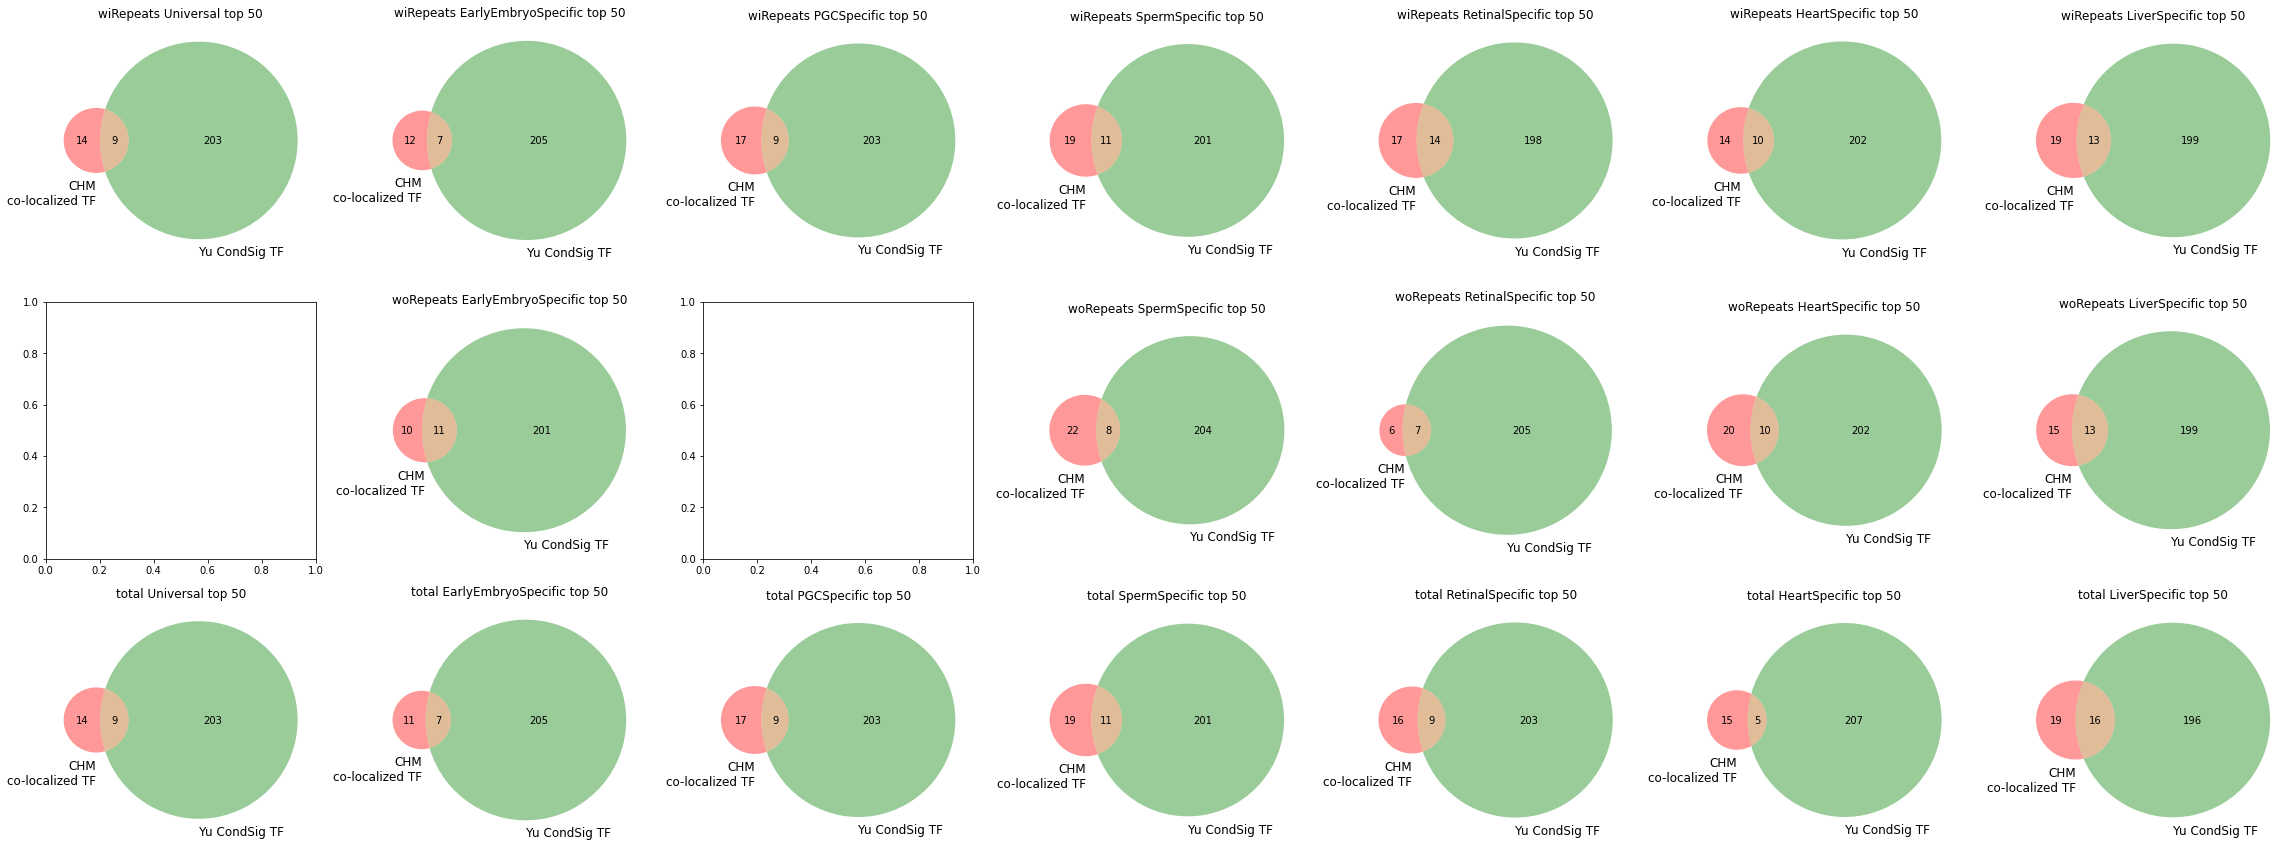

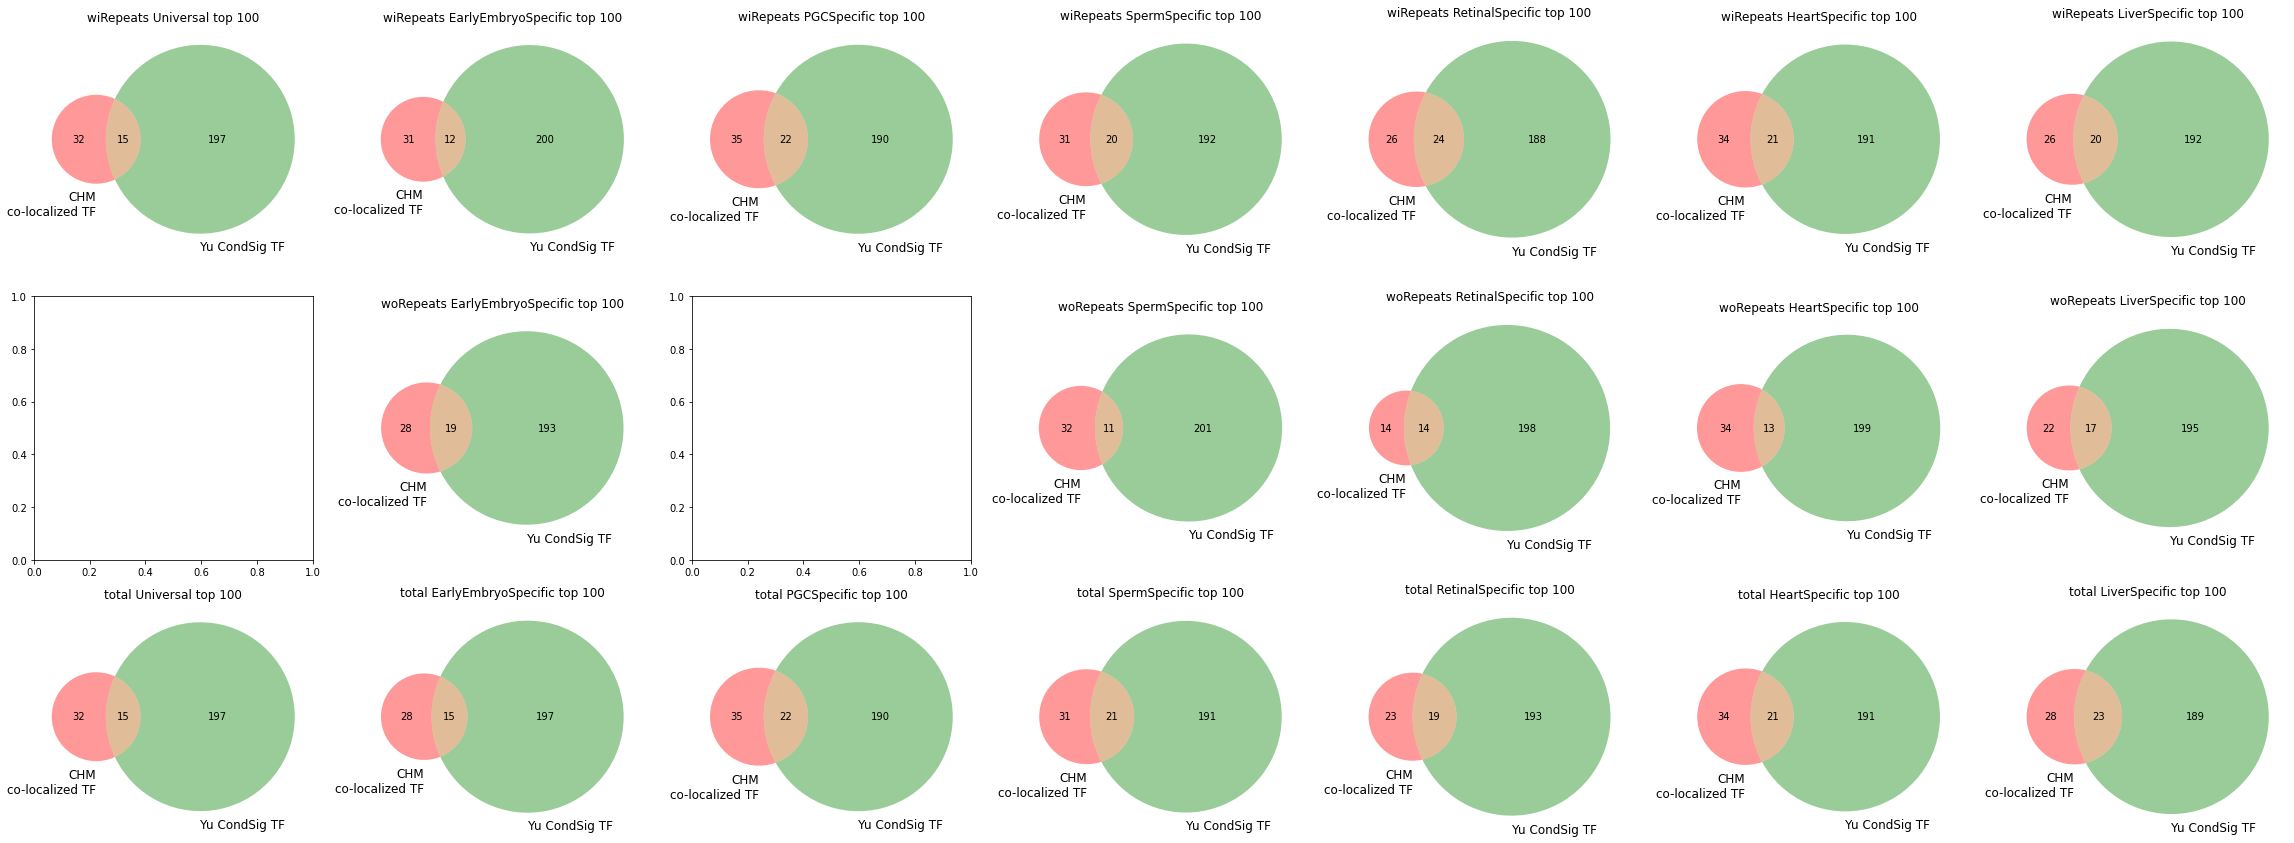

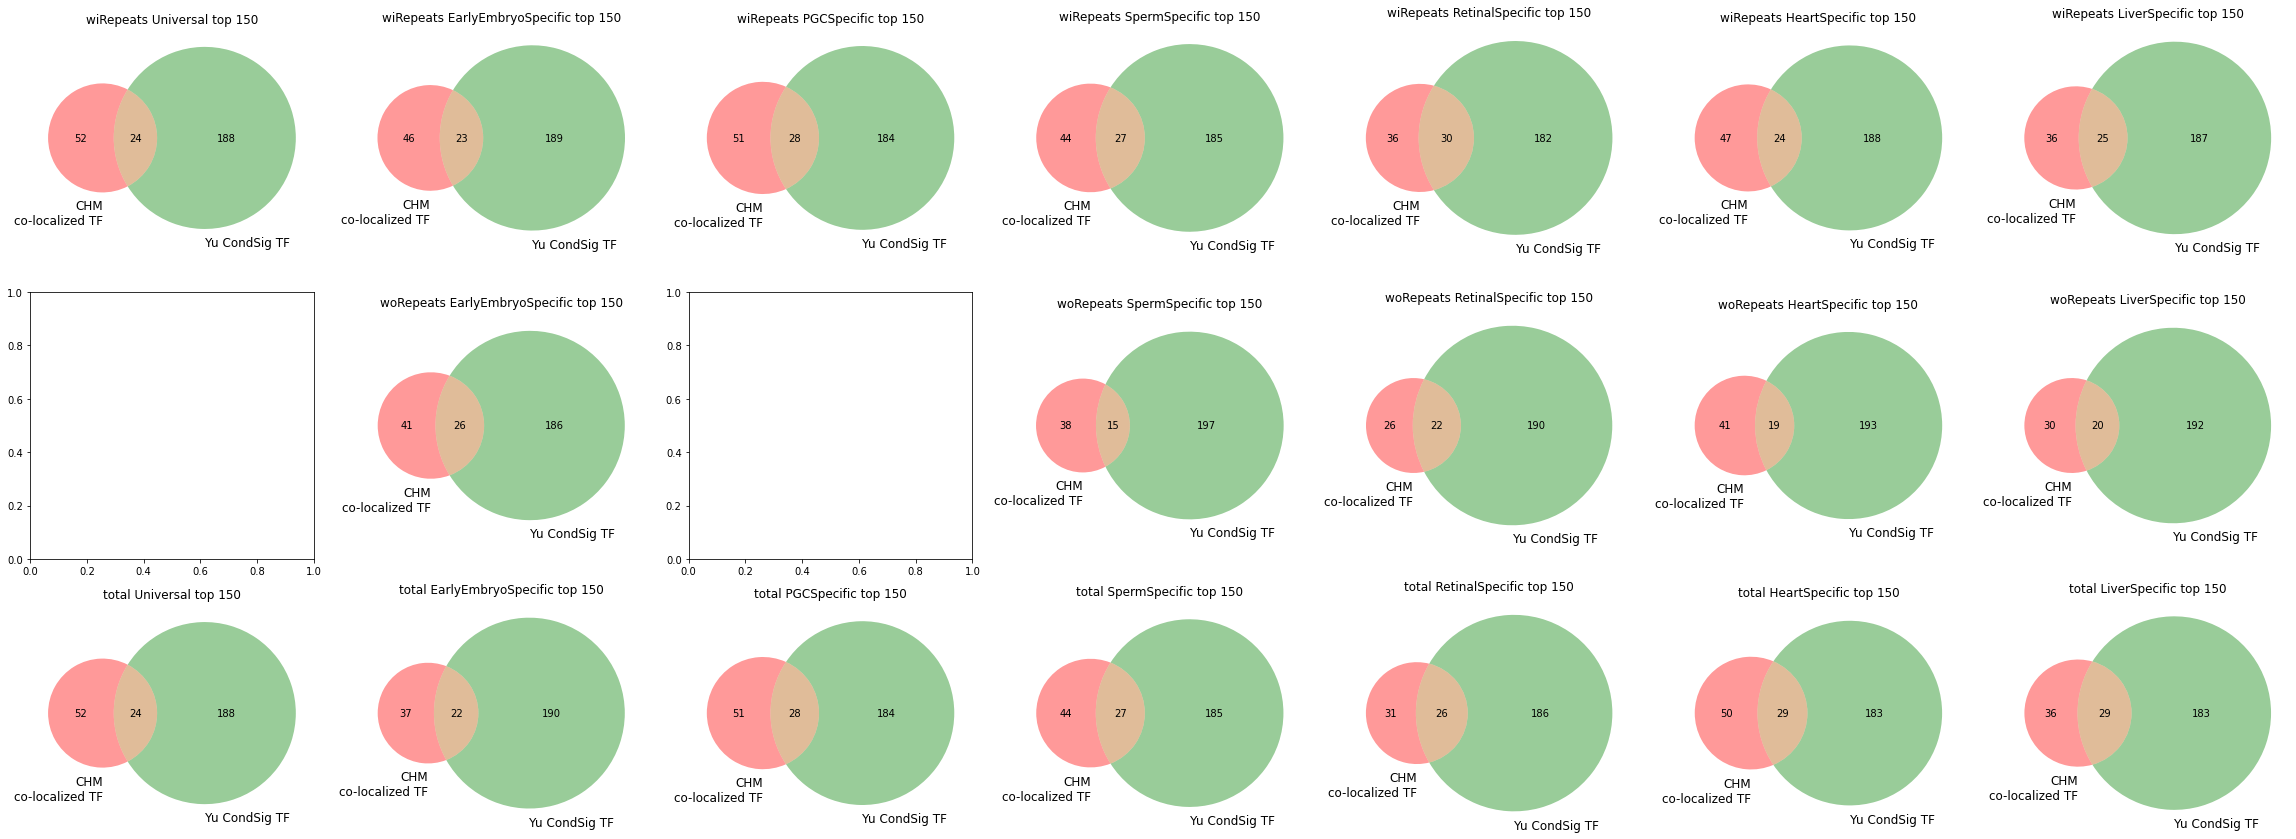

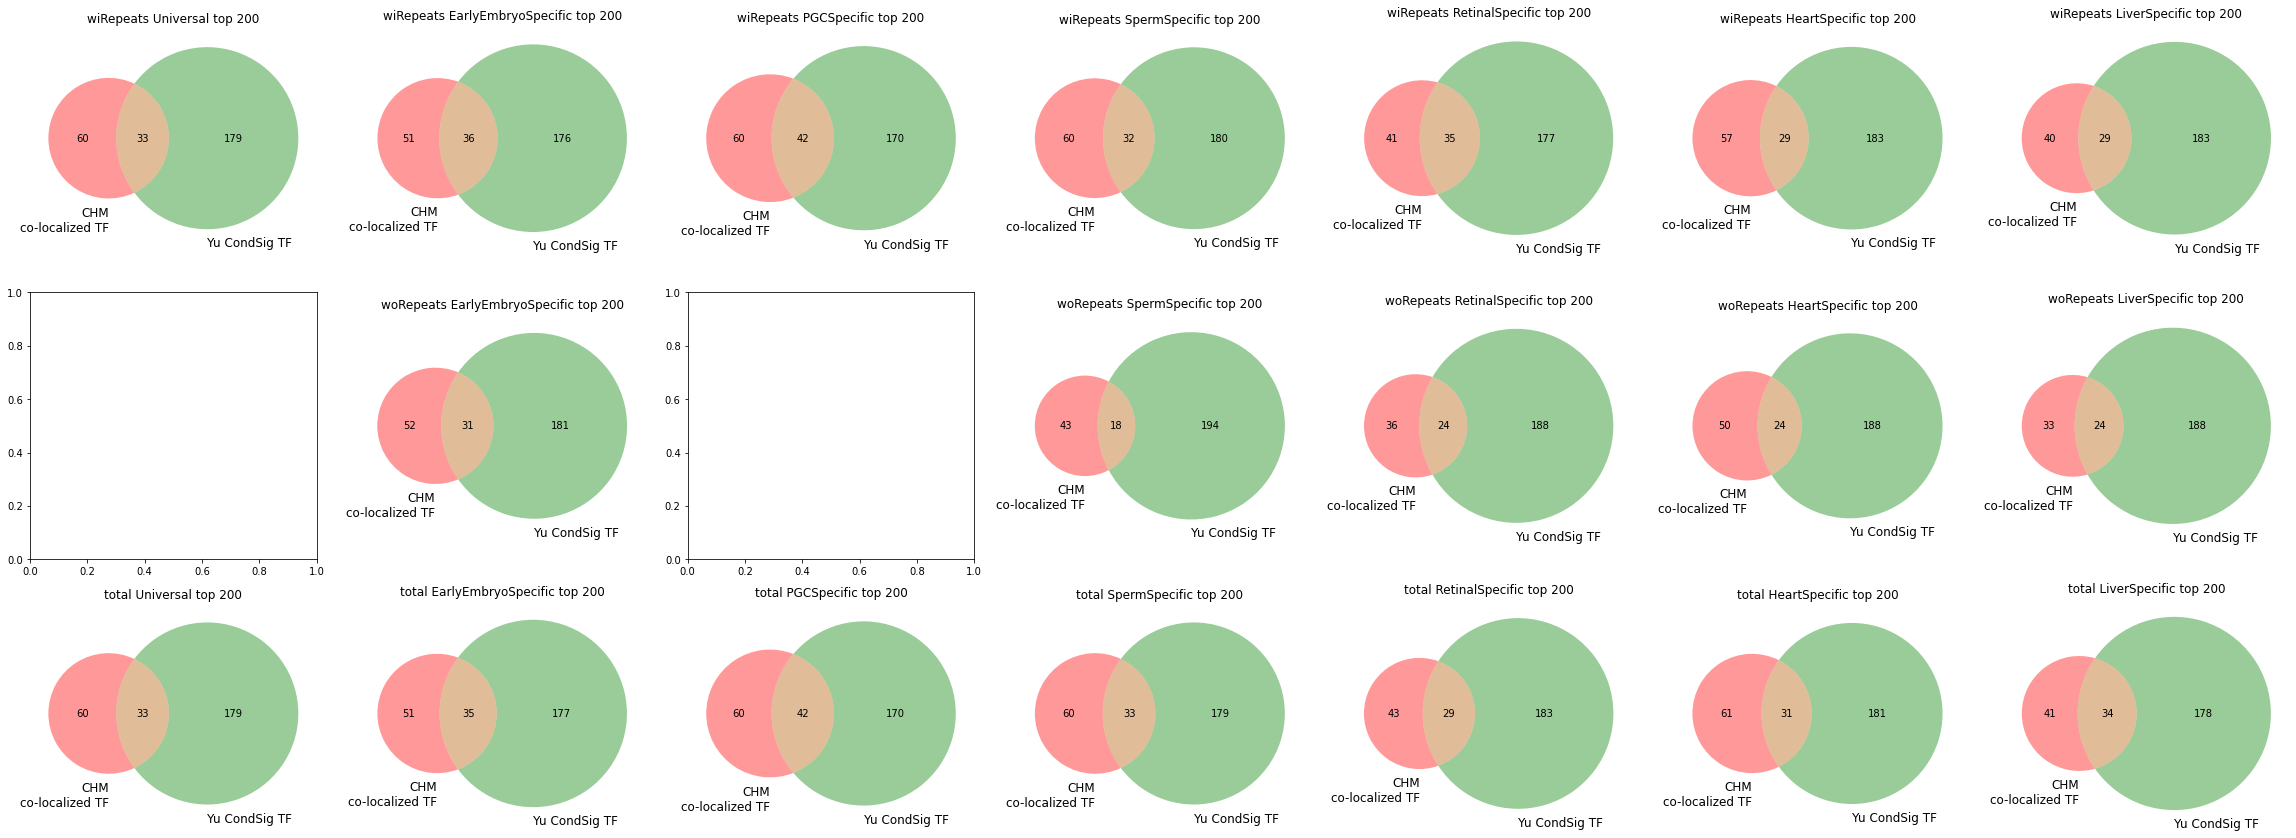

In [117]:
for top in [50, 100, 150, 200] :
    fig, axes = plt.subplots(3,7, figsize = (6.4 * 5, 4.8 * 2.5), tight_layout = True)
    for j,progress in enumerate(['Universal','EarlyEmbryoSpecific','PGCSpecific','SpermSpecific','RetinalSpecific','HeartSpecific','LiverSpecific']) :
        for i,condition in enumerate(['wiRepeats', 'woRepeats', 'total']) :
            ax = axes[i,j]
            try :
                chm_tf_ls = set(cobinding_TF_df_dict[top][condition][progress]['Factor'])
#                     print(chm_tf_ls & ps_tr_ls)
                venn2(
                    [chm_tf_ls, ps_tr_ls],
                    ax = ax,
                    set_labels=("CHM\nco-localized TF", "Yu CondSig TF", "")
                     )    
                ax.set_title(f"{condition} {progress} top {top}")
            except :
                continue
    fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make9_venn_phaseSep_TF_overlap_{top}.pdf', transparent = True)